In [ ]:
# install bs4, lib for get data from HTML

%pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import urllib.request
from bs4 import BeautifulSoup

In [ ]:
%pwd

'/content'

In [ ]:

  
# here we have to pass url and path
# (where you want to save ur text file)
urllib.request.urlretrieve("https://bola.kompas.com/read/2022/10/05/07453528/update-tragedi-kanjuruhan-alasan-pintu-tertutup-sanksi-arema-hingga-hasil-rapat?page=all",
                           "/content/text_file.txt")

  
file = open("text_file.txt", "r")
contents = file.read()
soup = BeautifulSoup(contents, 'html.parser')
  
f = open("test1.txt", "w")
  
# traverse paragraphs from soup
for data in soup.find_all("p"):
    sum = data.get_text()
    f.writelines(sum)

  
f.close()

In [ ]:
%ls

id.stopwords.02.01.2016.txt  sample_data/  text_file.txt
kata-dasar-indonesia.txt     test1.txt


In [ ]:
with open('test1.txt') as f:
  lines = f.readlines()
  print(lines)

['Update Tragedi Kanjuruhan: Alasan Pintu Tertutup, Sanksi Arema, hingga Hasil Rapat TGIPFKOMPAS.com -\xa0Sudah empat hari berlalu, tetapi tragedi Kanjuruhan masih menyisakan pilu. Sudah sejauh mana perkembangan kasus tersebut?Sabtu (1/10/2022) menjadi hari paling kelam dalam sejarah sepak bola Indonesia. Ratusan nyawa melayang dan lainnya luka-luka akibat tragedi Kanjuruhan.Kejadian tragis itu bermila dari pecahnya kerusuhan pasca-laga lanjutan Liga 1 Arema FC vs Persebaya Surabaya di yang berakhir dengan skor 2-3.Oknum suporter Arema FC merangsek masuk ke lapangan tak lama usai wasit meniupkan peluit panjang. Mereka lalu terlibat kericuhan dengan petugas keamanan.Aparat keamanan coba mengendalikan situasi dengan menembakkan gas air mata yang dilarang penggunaannya oleh FIFA.Baca juga: New York Times: Polisi Indonesia Kurang Terlatih Kendalikan Massa di KanjuruhanTembakan gas air mata tersebut disinyalir menjadi penyebab para suporter mengalami sesak napas, hingga menimbulkan korban j

In [ ]:
import numpy as np
import re

#Stemming with nazief and andriani algorithm

##Tokenizing

In [ ]:
def tokenizing(input):
  input = input.replace(".", "")
  input = input.replace(",", "")
  input = input.replace(":", "")
  input = input.replace("-", " ")
  input = input.replace("?", "")
  input = input.replace("!", "")
  input = input.replace("(", "")
  input = input.replace(")", "")
  input = input.replace("[", "")
  input = input.replace("]", "")
  input = input.replace("{", "")
  input = input.replace("}", "")
  input = input.replace("'", "")
  input = input.replace('"', "")
  input = input.replace("/", "")
  return input

##Stop word

In [ ]:
# open stopword

def stop_word(word):

  f = open('id.stopwords.02.01.2016.txt')
  s_word = f.read()

  if word not in s_word :
    return word
  

  f.close()


##Kamus

In [ ]:
kamus_clean = []

with open('kata-dasar-indonesia.txt') as f:
  kamus = f.read()
  kamus = kamus.split(' ')

  for w in kamus:
  
    rx = re.findall(r'[^\n]+$', w)

    kamus_clean.append(rx[0])

In [ ]:
AKAR_KATA = []

def kamus_word(word='tes'):
  
    # kamus = map(clean_word, kamus)
    if word in kamus_clean:
      AKAR_KATA.append(word)
      return None
    return word


##Hapus infleksional suffiks

In [ ]:
def hapus_infleksional_suffiks(word):
  # akhiran -lah, -kah, -nya, -tah, -pun
  if word.endswith('lah') or word.endswith('kah') or word.endswith('nya') or word.endswith('tah') or word.endswith('pun'):
    word = word[0 : len(word) - 3]
    
    # check if word exist in kamus
    word_check = kamus_word(word)
 
    return word_check

  # akhiran -ku, -mu
  elif word.endswith('ku') or word.endswith('mu'):
    word = word[0 : len(word) - 2]

    # check if word exist in kamus
    word_check = kamus_word(word)
    return word_check
    
  return word

##Hapus derivation suffixes

In [ ]:
def hapus_derivation_suffiks(word):
    # akhiran kan
  if word.endswith('kan'):
    word = word[0 : len(word) - 3]

    # check if word exist in kamus
    word_check = kamus_word(word)
    return word_check

  # akhiran i
  if word.endswith('i'):
    word = word[0 : len(word) - 1]

    # check if word exist in kamus
    word_check = kamus_word(word)
    return word_check

  # akhiran an
  if word.endswith('an'):
    word = word[0 : len(word) - 2]

    # check if word exist in kamus
    word_check = kamus_word(word)
    return word_check


  return word

##Hapus derivation prefiks

In [ ]:
def hapus_derivation_prefiks(word):
  # awalan mempel-
  if (word.startswith('mempel')) and (len(word) > 6):
    sub_word = word[6:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:    
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check
      
    return word_check
  
  # awalan memper-
  if (word.startswith('memper')) and (len(word) > 6):
    sub_word = word[6:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check

    return word_check

  # awalan diper-, keber-, keter-
  if (word.startswith('diper') or word.startswith('keber') or word.startswith('keter')) and (len(word) > 5):
    sub_word = word[5:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  

      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check
    return word_check

  # awalan meng-, peng-
  if (word.startswith('meng') or word.startswith('peng')) and (len(word) > 4):
    sub_word = word[4:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)
      # check word again in kamus
      word_check = kamus_word(word_pref_suff)

      if word_check != None:  
        # add 'k' in front word
        sub_word = 'k' + word_check

        # check word again in kamus
        word_check = kamus_word(sub_word)

        if word_check != None:  
          # check word in derivation suffiks
          word_pref_suff_k = hapus_derivation_suffiks(word_check)

          # check word again in kamus after add k in front
          word_check = kamus_word(word_pref_suff_k)
          return word_check
    
    return word_check

  # awalan meny-, peny-
  if (word.startswith('meny') or word.startswith('peny')) and (len(word) > 4):
    sub_word = word[4:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      if word_check != None:  

        # add 's' in front word
        sub_word = 's' + word_check

        # check word again in kamus
        word_check = kamus_word(sub_word)
        if word_check != None:  
          # check word in derivation suffiks
          word_pref_suff_s = hapus_derivation_suffiks(word_check)

          # check word again in kamus after add s in front
          word_check = kamus_word(word_pref_suff_s)
          return word_check
    return word_check

  # awalan mel-, mer-, pel-, per-
  if (word.startswith('mel') or word.startswith('mer') or word.startswith('pel') or word.startswith('per')) and (len(word) > 3):
    sub_word = word[3:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check
    return word_check

  # awalan men-, pen-
  if (word.startswith('men') or word.startswith('pen')) and (len(word) > 3):
    sub_word = word[3:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      if word_check != None:  
        # add 's' in front word
        sub_word = 't' + word_check

        # check word again in kamus
        word_check = kamus_word(sub_word)
        
        if word_check != None:  
          # check word in derivation suffiks
          word_pref_suff_t = hapus_derivation_suffiks(word_check)

          # check word again in kamus after add s in front
          word_check = kamus_word(word_pref_suff_t)
          return word_check
    return word_check

    
  # awalan mem-, pem-
  if (word.startswith('mem') or word.startswith('pem')) and (len(word) > 3):
    sub_word = word[3:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      if word_check != None:  
        # add 's' in front word
        sub_word = 'p' + word_check

        # check word again in kamus
        word_check = kamus_word(sub_word)
        
        if word_check != None:     
          # check word in derivation suffiks
          word_pref_suff_p = hapus_derivation_suffiks(word_check)

          # check word again in kamus after add s in front
          word_check = kamus_word(word_pref_suff_p)
          return word_check
    return word_check
  # awalan bel-, ber-, tel-, ter-
  if (word.startswith('bel') or word.startswith('ber') or word.startswith('tel') or word.startswith('ter')) and (len(word) > 3):
    sub_word = word[3:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check

    return word_check

  # tipe awalan ke 1 : di-, ke-, se-
  if (word.startswith('di') or word.startswith('ke') or word.startswith('se')) and (len(word) > 2):
    sub_word = word[2:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check
    return word_check


  # tipe awalan ke 2 : be-, te-
  if (word.startswith('be') or word.startswith('te')) and (len(word) > 2):
    sub_word = word[2:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)
    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check

    return word_check

  # tipe awalan ke 3 : me-, pe-
  if (word.startswith('me') or word.startswith('pe')) and (len(word) > 2):
    sub_word = word[2:]
    # check if word exist in kamus
    word_check = kamus_word(sub_word)

    if word_check != None:  
      # check word in derivation suffiks
      word_pref_suff = hapus_derivation_suffiks(word_check)

      # check word again in kamus
      word_check = kamus_word(word_pref_suff)
      return word_check

    return word_check



## Main

In [ ]:
with open('test1.txt') as f:
  words = f.read()
  # print(f'jumlah kata awal : {len(words)}')

  # lower words
  words = words.lower()

  # tokenizing
  words = tokenizing(words)
  # print(f'jumlah kata setelah tokenizing : {len(words)}')

  # split words
  words = words.split(' ')
  print(f'jumlah kata awal : {len(words)}')


  list_stop_words = []
  # stop word
  for w in words:
    word = stop_word(w)
    if word != None:
      list_stop_words.append(word)

  print(f'jumlah kata setelah stop word : {len(list_stop_words)}')

  list_not_in_kamus_words = []
  # kamus word
  for w in list_stop_words:
    word = kamus_word(w)
    if word != None:
      list_not_in_kamus_words.append(word)
  
  print(f'jumlah kata setelah kamus : {len(list_not_in_kamus_words)}')
  print(f'Akar kata {len(AKAR_KATA)}')

  # hapus infleksional suffiks
  list_not_infleksional_suffiks = []

  for w in list_not_in_kamus_words:
    word = hapus_infleksional_suffiks(w)
    if word != None:
      list_not_infleksional_suffiks.append(word)
  
  print(f'jumlah kata setelah infleksional suffiks : {len(list_not_infleksional_suffiks)}')
  print(f'Akar kata {len(AKAR_KATA)}')

  # hapus derivation suffiks
  list_not_derivation_suffiks = []

  for w in list_not_infleksional_suffiks:
    word = hapus_derivation_suffiks(w)
    if word != None:
      list_not_derivation_suffiks.append(word) 
  
  print(f'jumlah kata setelah derivation suffiks : {len(list_not_derivation_suffiks)}')
  print(f'Akar kata {len(AKAR_KATA)}')

  # hapus derivation prefix
  list_not_in_kamus = []

  for w in list_not_derivation_suffiks:
    word = hapus_derivation_prefiks(w)
    if word != None:
      list_not_in_kamus.append(word)

  print(f'jumlah kata setelah derivation prefiks : {len(list_not_in_kamus)}')
  print(f'Akar kata {len(AKAR_KATA)}')

  print(f'Kata yang tak ada di kamus {list_not_in_kamus}')


jumlah kata awal : 991
jumlah kata setelah stop word : 609
jumlah kata setelah kamus : 399
Akar kata 210
jumlah kata setelah infleksional suffiks : 391
Akar kata 218
jumlah kata setelah derivation suffiks : 361
Akar kata 248
jumlah kata setelah derivation prefiks : 43
Akar kata 378
Kata yang tak ada di kamus ['sebutsabtu', 'ayang', 'mila', 'sebaya', 'angsek', 'amananaparat', 'sebaya', 'buka\xa0ketua', 'lesai“pintu', 'be', 'aksana', 'tambahkanbaca', 'aksana', 'akhir“kadang', 'a\xa0“kadang', 'tambahkanselasa', 'is', 'aksana', 'curity', 'ang', 'aksana', 'sangkakedua', 'aksana', 'aksana', 'curity', 'sidikan\xa0menurut', 'jadianbaca', 'ang', 'hat', 'menpora', 'tcar', 'enggut', 'sepakbola', 'ekomendas', 'sebaya', 'ekomendas', 'lakukanselanjut', 'kesinambung', 'setuju', 'normalisas', 'aksana', 'penangdapat', 'rimudata']


In [ ]:
print(AKAR_KATA)
print(len(AKAR_KATA))

['tragedi', 'pintu', 'sanksi', 'hasil', 'rapat', 'tragedi', 'pilu', 'sejarah', 'sepak', 'bola', 'nyawa', 'akibat', 'tragedi', 'tragis', 'laga', 'liga', 'skor', 'suporter', 'wasit', 'peluit', 'coba', 'situasi', 'air', 'polisi', 'massa', 'air', 'suporter', 'sesak', 'napas', 'korban', 'kabupaten', 'malang', 'timur', 'korban', 'tewas', 'tragedi', 'stadion', 'tragedi', 'sejarah', 'sepak', 'bola', 'tragedi', 'kompas', 'pintu', 'stadion', 'menit', 'hasil', 'rapat', 'perdana', 'akar', 'tragedi', 'laga', 'rampung', 'pintu', 'stadion', 'komite', 'wasit', 'pintu', 'stadion', 'kendati', 'komando', 'pintu', 'tugas', 'fakta', 'mepet', 'pintu', 'stadion', 'statuta', 'menit', 'situasi', 'stadion', 'stadion', 'panitia', 'pintu', 'stadion', 'laga', 'kadang', 'peluit', 'kadang', 'menit', 'kondisi', 'investigasi', 'sistem', 'sidang', 'ketua', 'panitia', 'hasil', 'sidang', 'tragedi', 'denda', 'juta', 'sanksi', 'ketua', 'sesi', 'konferensi', 'virtual', 'tuan', 'rumah', 'sisa', 'liga', 'musim', 'laga', 'kand

In [ ]:
if 'libat' in AKAR_KATA:
  print('ada')

ada


In [ ]:
# clean AKAR_KATA in case start again
# AKAR_KATA = []

## Visualize the text

In [ ]:
import pandas as pd

In [ ]:
data = {'Kata awal' : len(words), 'Kata setelah stop word' : len(list_stop_words), 'Kata setelah Kamus' : len(list_not_in_kamus_words), 'Kata setelah infleksional suffiks': len(list_not_infleksional_suffiks), 'Kata setelah derivation suffiks': len(list_not_derivation_suffiks), 'Kata setelah derivation prefiks (Tidak ada di kamus)' : len(list_not_in_kamus), "Akar Kata" : len(AKAR_KATA) }
data
# data_df = pd.DataFrame(data=data)


{'Kata awal': 991,
 'Kata setelah stop word': 609,
 'Kata setelah Kamus': 399,
 'Kata setelah infleksional suffiks': 391,
 'Kata setelah derivation suffiks': 361,
 'Kata setelah derivation prefiks (Tidak ada di kamus)': 43,
 'Akar Kata': 378}

In [ ]:
data_df = pd.DataFrame(data=[data])
data_df

,Kata awal,Kata setelah stop word,Kata setelah Kamus,Kata setelah infleksional suffiks,Kata setelah derivation suffiks,Kata setelah derivation prefiks (Tidak ada di kamus),Akar Kata
0,991,609,399,391,361,43,378


Text(0, 0.5, 'Jumlah kata')

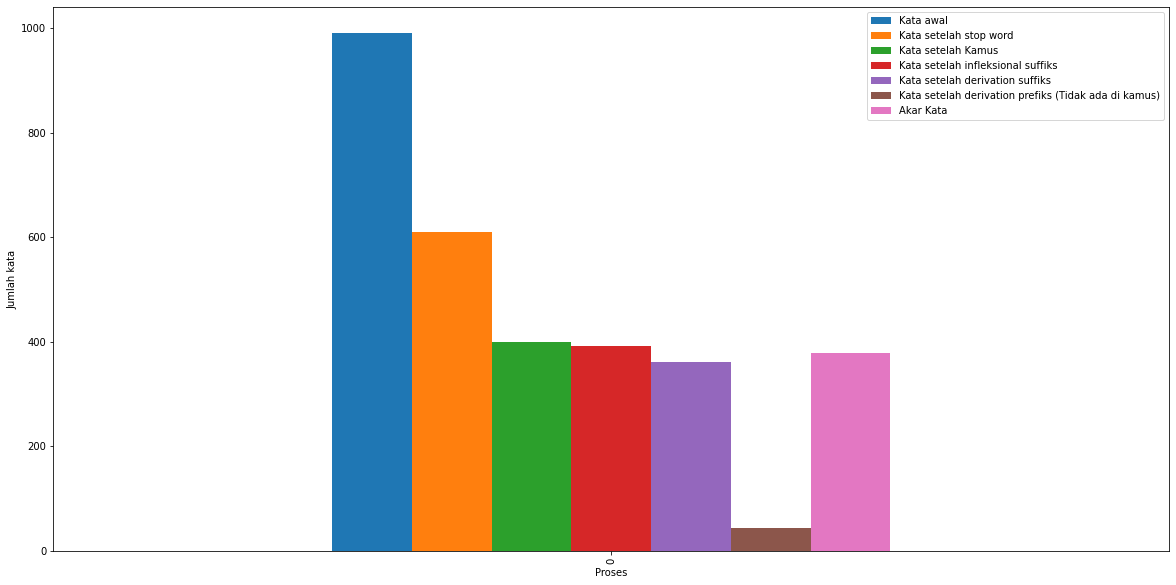

In [ ]:
v_data = data_df.plot(kind='bar',figsize=(20,10))
v_data.set_xlabel("Proses")
v_data.set_ylabel("Jumlah kata")

# plt.sublpot


##Save text to txt file

In [ ]:
with open('akar_kata_artikel.txt', 'w') as f:
  for t in AKAR_KATA:
    f.write(t + ' ')

In [ ]:
%ls

akar_kata_artikel.txt        kata-dasar-indonesia.txt  test1.txt
id.stopwords.02.01.2016.txt  sample_data/              text_file.txt


In [ ]:
with open('akar_kata_artikel.txt', 'r') as f:
  print(f.read())

tragedi pintu sanksi hasil rapat tragedi pilu sejarah sepak bola nyawa akibat tragedi tragis laga liga skor suporter wasit peluit coba situasi air polisi massa air suporter sesak napas korban kabupaten malang timur korban tewas tragedi stadion tragedi sejarah sepak bola tragedi kompas pintu stadion menit hasil rapat perdana akar tragedi laga rampung pintu stadion komite wasit pintu stadion kendati komando pintu tugas fakta mepet pintu stadion statuta menit situasi stadion stadion panitia pintu stadion laga kadang peluit kadang menit kondisi investigasi sistem sidang ketua panitia hasil sidang tragedi denda juta sanksi ketua sesi konferensi virtual tuan rumah sisa liga musim laga kandang alias lokasi markas mesti denda hasil sidang klub panitia tuan rumah markas malang lokasi tragedi tahap polisi klub sanksi denda juta berat klub badan haris ketua aktif sepak bola humas tragedi tahap tim tragedi saksi anggota panitia stadion sepak bola tragedi ayah tahap alat bukti saksi ahli panitia es

In [ ]:
%rm akar_kata_artikel  

rm: cannot remove 'akar_kata_artikel': No such file or directory
